In [1]:
# Load all dictionaries
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import scikit_posthocs as sp
from scipy.stats import wilcoxon
from heatmaps_functions import *

sns.set_context("poster", font_scale=1.1)
sns.set_style("ticks")

In [2]:
paths_target=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_target_far_stim.xlsx',
             'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_target_far_delay.xlsx',
             'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_target_far_resp.xlsx',
              
              'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_target_close_stim.xlsx',
             'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_target_close_delay.xlsx',
             'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_target_close_resp.xlsx']

paths_target_shuff=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_target_far_stim.xlsx',
                    'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_target_far_delay.xlsx',
                    'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_target_far_resp.xlsx',
                    
                    'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_target_close_stim.xlsx',
                    'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_target_close_delay.xlsx',
                    'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_target_close_resp.xlsx']


In [3]:
paths_distractor=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_dist_far_stim.xlsx', 
                  'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_dist_far_delay.xlsx', 
                  'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_dist_far_resp.xlsx',
                  
                  'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_dist_close_stim.xlsx', 
                  'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_dist_close_delay.xlsx', 
                  'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_dist_close_resp.xlsx']

paths_distractor_shuff=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_dist_far_stim.xlsx', 
                        'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_dist_far_delay.xlsx', 
                        'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_dist_far_resp.xlsx',
                        
                        'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_dist_close_stim.xlsx', 
                        'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_dist_close_delay.xlsx', 
                        'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_dist_close_resp.xlsx']

In [4]:
df_target=[]
df_target_shuff=[]

for PathI in paths_target:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[1]
    distance = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[3]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    df_x['distance'] = distance
    #
    df_target.append(df_x)
    
#
df_target=pd.concat(df_target, axis=0)

####################

for PathI in paths_target_shuff:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    distance = path_save_signal.split('\\')[-1].split('.')[0].split('_')[3]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[4]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    df_x['distance'] = distance
    #
    df_target_shuff.append(df_x)
    
#
df_target_shuff=pd.concat(df_target_shuff, axis=0)


In [5]:
df_distractor=[]
df_distractor_shuff=[]


for PathI in paths_distractor:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[1]
    distance = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[3]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    df_x['distance'] = distance
    #
    df_distractor.append(df_x)
    
#
df_distractor=pd.concat(df_distractor, axis=0)

####################

for PathI in paths_distractor_shuff:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    distance = path_save_signal.split('\\')[-1].split('.')[0].split('_')[3]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[4]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    df_x['distance'] = distance
    #
    df_distractor_shuff.append(df_x)
    
#
df_distractor_shuff=pd.concat(df_distractor_shuff, axis=0)

In [6]:
#### Hay que substract!

In [7]:
df = pd.concat([df_target, df_distractor])
df['label']= df['item'] + ' ' + df['distance'] 
df['label'] = df['label'].replace(['target close', 'target far', 'dist close', 'dist far'], ['tc', 'tf', 'dc', 'df'])
df.head()

times   decoding region subject condition label    item trained distance
0  0.000  -6.452111    ips    n001     2_0.2    tf  target    stim      far
1  2.335  -5.357404    ips    n001     2_0.2    tf  target    stim      far
2  4.670   2.072382    ips    n001     2_0.2    tf  target    stim      far
3  7.005  10.049902    ips    n001     2_0.2    tf  target    stim      far
4  9.340   7.811707    ips    n001     2_0.2    tf  target    stim      far

In [8]:
df_shuff = pd.concat([df_target_shuff, df_distractor_shuff])
df_shuff['label']= df_shuff['item'] + ' ' + df_shuff['distance'] 
df_shuff['label'] = df_shuff['label'].replace(['target close', 'target far', 'dist close', 'dist far'], ['tc', 'tf', 'dc', 'df'])
df_shuff.head()

times  decoding  region subject condition label    item trained distance
0  0.000 -0.470339  visual    d001     1_0.2    tf  target    stim      far
1  2.335 -0.465293  visual    d001     1_0.2    tf  target    stim      far
2  4.670  0.306104  visual    d001     1_0.2    tf  target    stim      far
3  7.005  0.230864  visual    d001     1_0.2    tf  target    stim      far
4  9.340 -0.279853  visual    d001     1_0.2    tf  target    stim      far

In [9]:
print(len(df))
print(len(df_shuff))

13824
138240


In [10]:
for cond in ['1_0.2']:
    for reg in ['visual', 'ips', 'pfc']:
        for subj in ['d001', 's001', 'l001', 'n001', 'b001', 'r001']:
            for dist in ['close','far']: ##falta el close
                for trained in ['stim', 'delay', 'resp']:
                    for item in ['target', 'dist']:
                        a=1


In [17]:
df_delay=[]
for cond in ['1_0.2', '1_7', '2_0.2', '2_7']:
    for reg in ['visual', 'ips', 'pfc']:
        for subj in ['d001', 's001', 'l001', 'n001', 'b001', 'r001']:
            for dist in ['close','far']: ##falta el close
                for trained in ['stim', 'delay', 'resp']:
                    for item in ['target', 'dist']:
                        ####
                        if cond == '1_0.2':
                            dfn = df.loc[(df['region']==reg) & 
                                     ( (df['times']>= 9.34) & (df['times']<= 18.688) ) & 
                                     ( df['distance']==dist) & (df['trained']==trained) & 
                                     ( df['item']==item)]
                            #
                            dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                                     ( (df_shuff['times']>= 9.34) & (df_shuff['times']<= 18.688) ) & 
                                     ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                                     ( df_shuff['distance']==dist) & (df_shuff['trained']==trained) & 
                                     ( df_shuff['item']==item)]
                            
                            ###
                            decoding = dfn.decoding.mean() #option1
                            decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                            ###
                            df_delay.append( [ 'delay', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                          item, trained, dist] )
                            #                    
                        elif cond == '2_0.2':
                            dfn = df.loc[(df['region']==reg) & 
                                     ( (df['times']>= 9.34) & (df['times']<= 18.688) ) & 
                                     ( df['condition']==cond) & (df['subject']==subj) &  
                                     ( df['distance']==dist) & (df['trained']==trained) & 
                                     ( df['item']==item)]
                            #
                            dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                                     ( (df_shuff['times']>= 9.34) & (df_shuff['times']<= 18.688) ) & 
                                     ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                                     ( df_shuff['distance']==dist) & (df_shuff['trained']==trained) & 
                                     ( df_shuff['item']==item)]
                            
                            ###
                            decoding = dfn.decoding.mean() #option1
                            decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                            ###
                            df_delay.append( [ 'delay', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                          item, trained, dist] )    
                            #
                        elif cond =='1_7':
                            if item=='target':
                                dfn = df.loc[(df['region']==reg) & 
                                         ( (df['times']== 9.34) | (df['times']== 11.675) ) & 
                                         ( df['condition']==cond) & (df['subject']==subj) &  
                                         ( df['distance']==dist) & (df['trained']==trained) & 
                                         ( df['item']==item)]
                                #
                                dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                                         ( (df_shuff['times']== 9.34) | (df_shuff['times']== 11.675  ) ) & 
                                         ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                                         ( df_shuff['distance']==dist) & (df_shuff['trained']==trained) & 
                                         ( df_shuff['item']==item)]

                                ###
                                decoding = dfn.decoding.mean() #option1
                                decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                                ###
                                df_delay.append( [ 'delay1', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                              item, trained, dist] )   
                            ####
                            elif item=='dist':
                                dfn = df.loc[(df['region']==reg) & 
                                         ( (df['times']== 16.345) | (df['times']== 18.68  ) ) & 
                                         ( df['condition']==cond) & (df['subject']==subj) &  
                                         ( df['distance']==dist) & (df['trained']==trained) & 
                                         ( df['item']==item)]
                                #
                                dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                                         ( (df_shuff['times']== 16.345) | (df_shuff['times']== 18.68  ) ) & 
                                         ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                                         ( df_shuff['distance']==dist) & (df_shuff['trained']==trained) & 
                                         ( df_shuff['item']==item)]

                                ###
                                decoding = dfn.decoding.mean() #option1
                                decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                                ###
                                df_delay.append( [ 'delay1', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                              item, trained, dist] )        
                                #
                            #
                        #
                        elif cond =='2_7': ##just the TRs they are "alone"; in 1_ there is coexistance!
                            if item=='target':
                                dfn = df.loc[(df['region']==reg) & 
                                         ( (df['times']== 16.345) | (df['times']== 18.68  ) ) & 
                                         ( df['condition']==cond) & (df['subject']==subj) &  
                                         ( df['distance']==dist) & (df['trained']==trained) & 
                                         ( df['item']==item)]
                                #
                                dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                                         ( (df_shuff['times']== 16.345) | (df_shuff['times']== 18.68  ) ) & 
                                         ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                                         ( df_shuff['distance']==dist) & (df_shuff['trained']==trained) & 
                                         ( df_shuff['item']==item)]

                                ###
                                decoding = dfn.decoding.mean() #option1
                                decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                                ###
                                df_delay.append( [ 'delay1', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                              item, trained, dist] )   
                                #
                            elif item=='dist':
                                dfn = df.loc[(df['region']==reg) & 
                                         ( (df['times']== 9.34) | (df['times']== 11.675) ) & 
                                         ( df['condition']==cond) & (df['subject']==subj) &  
                                         ( df['distance']==dist) & (df['trained']==trained) & 
                                         ( df['item']==item)]
                                #
                                dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                                         ( (df_shuff['times']== 9.34) | (df_shuff['times']== 11.675  ) ) & 
                                         ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                                         ( df_shuff['distance']==dist) & (df_shuff['trained']==trained) & 
                                         ( df_shuff['item']==item)]

                                ###
                                decoding = dfn.decoding.mean() #option1
                                decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                                ###
                                df_delay.append( [ 'delay1', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                              item, trained, dist] )   
                            ####
                            
                       
####

df_delay = pd.DataFrame(df_delay)
df_delay.columns=['times', 'decoding', 'decoding_sh','region', 'subject', 'condition', 'label', 'item', 'trained', 'distance']


In [18]:
df_delay.head()

times  decoding  decoding_sh  region subject condition label    item  \
0  delay -1.932018    -1.792534  visual    d001     1_0.2    tc  target   
1  delay -2.151991    -2.261918  visual    d001     1_0.2    dc    dist   
2  delay  1.238720     1.150621  visual    d001     1_0.2    tc  target   
3  delay -0.720974    -0.725406  visual    d001     1_0.2    dc    dist   
4  delay  0.434070     0.251041  visual    d001     1_0.2    tc  target   

  trained distance  
0    stim    close  
1    stim    close  
2   delay    close  
3   delay    close  
4    resp    close

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


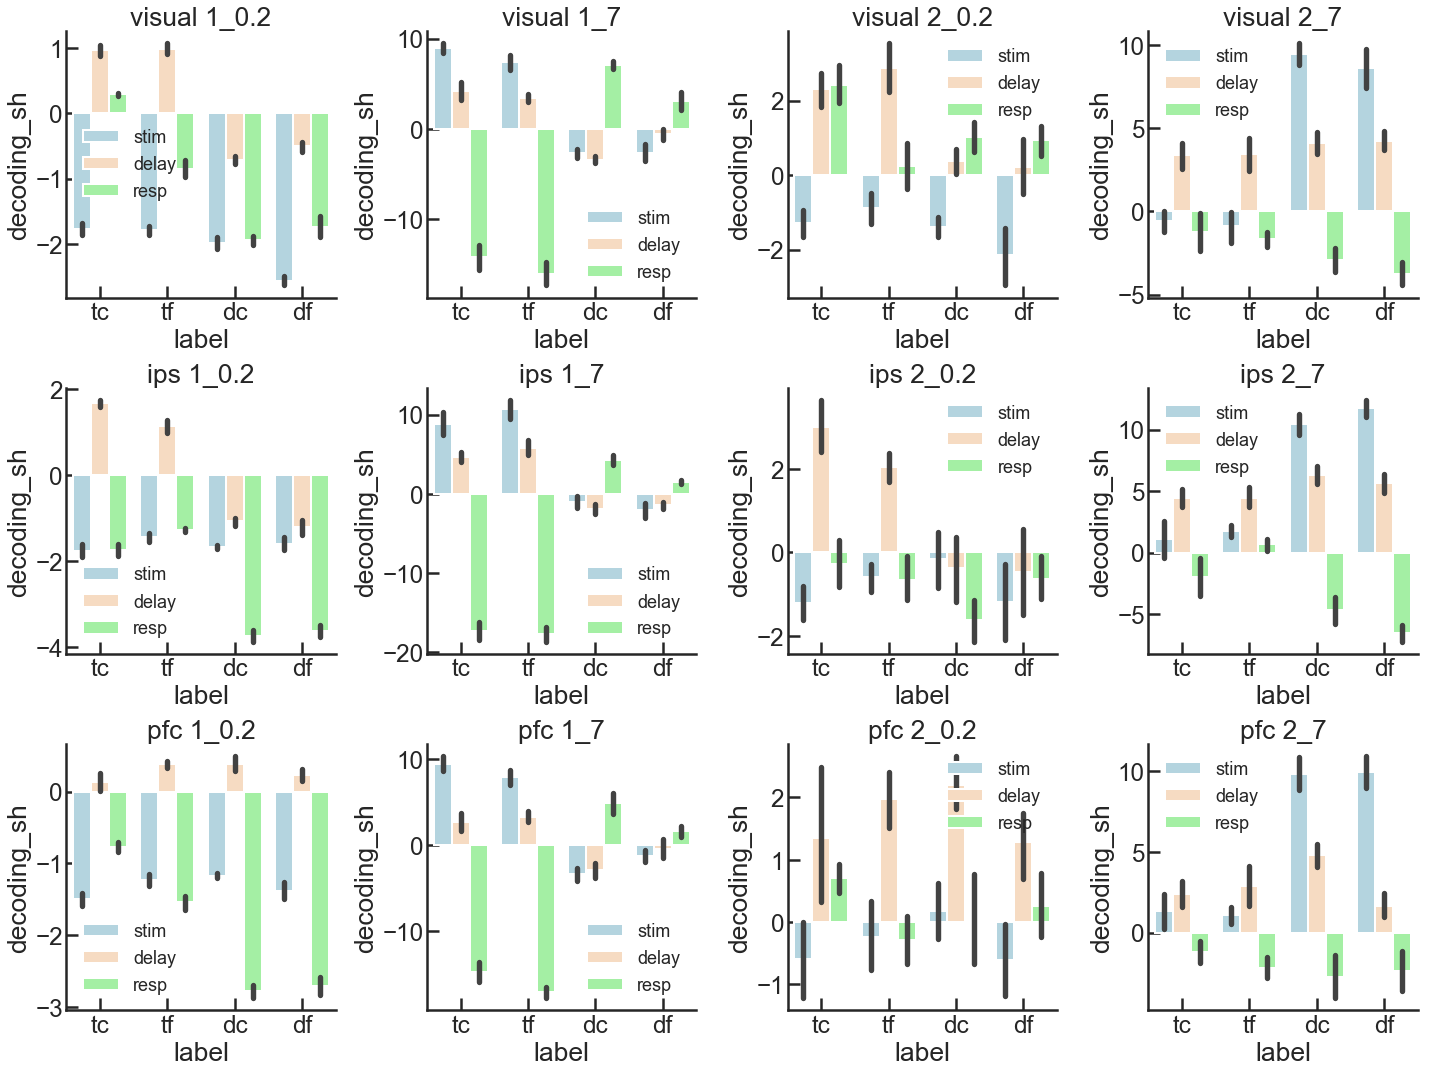

In [21]:
plt.figure(figsize=(20,15))

for idx_a, A in enumerate(['visual', 'ips', 'pfc']):
    for idx_c, C in enumerate(['1_0.2', '1_7', '2_0.2', '2_7']):
        plt.subplot(3,4, 4*idx_a+idx_c+1)
        sns.barplot(x='label', y='decoding_sh', hue='trained', order=['tc', 'tf', 'dc', 'df'],
                    data=df_delay.loc[(df_delay['condition']==C) & (df_delay['region']==A)], 
                    palette=['lightblue', 'peachpuff', 'palegreen'], ci=68)
        plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
        plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
        plt.gca().get_xaxis().tick_bottom()                                                                                         
        plt.gca().get_yaxis().tick_left()
        plt.gca().tick_params(direction='in') #direction
        plt.legend(loc='best', frameon=False, prop={'size': 18})
        plt.title(A + ' ' + C)
        plt.xticks(rotation=0)
        

plt.tight_layout()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


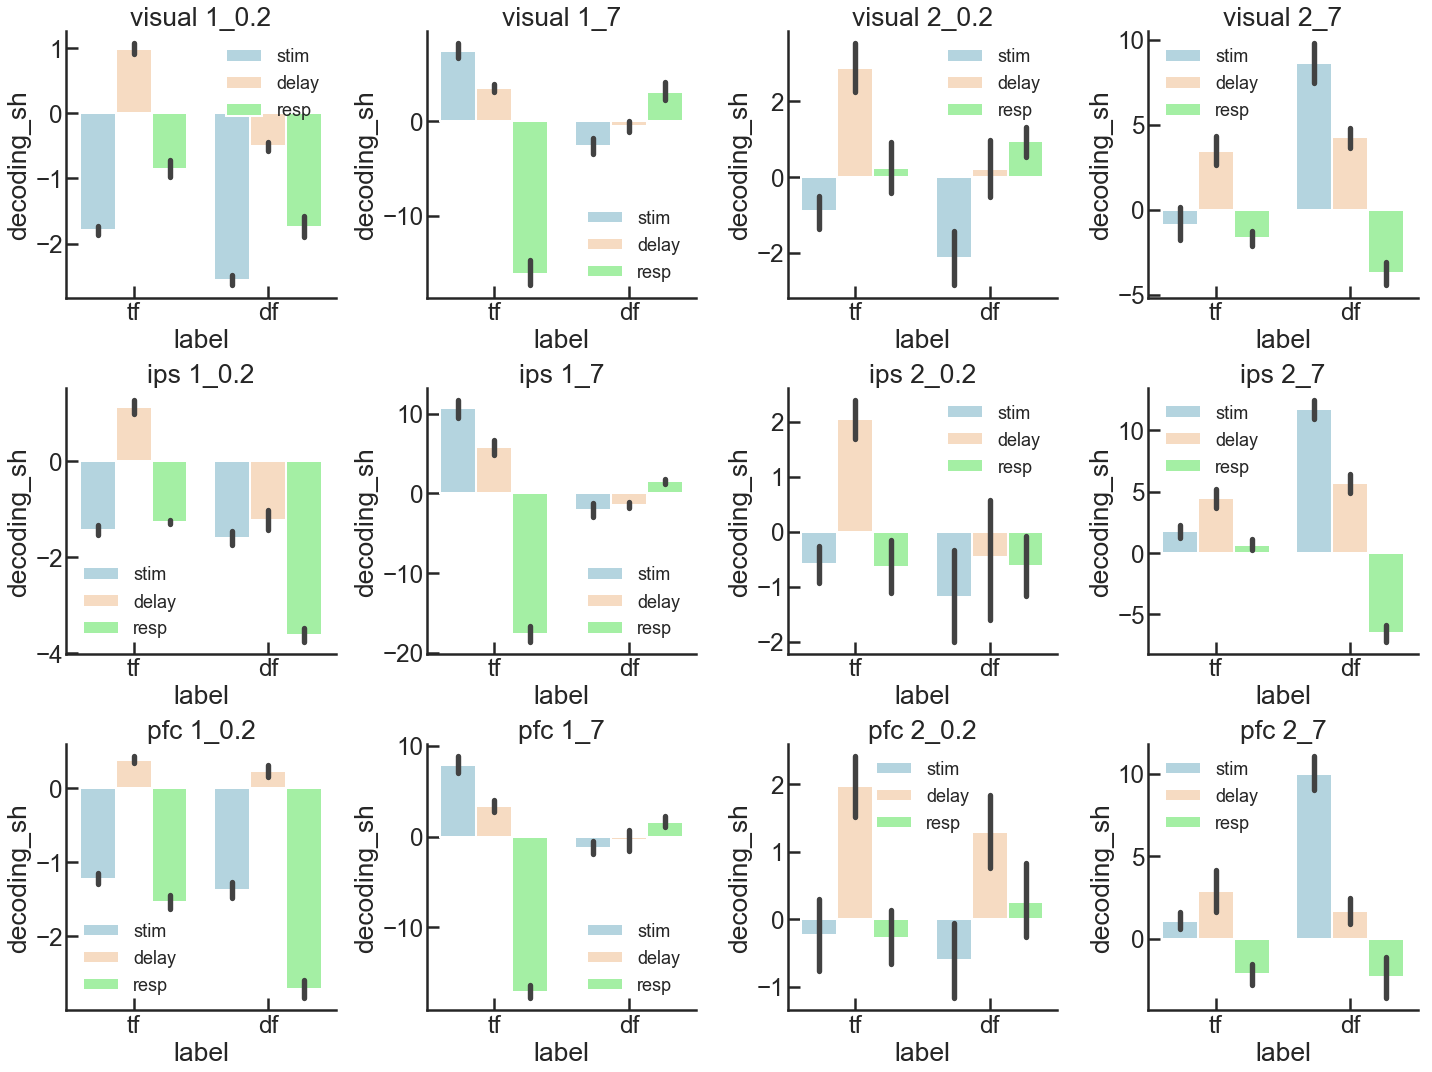

In [22]:
plt.figure(figsize=(20,15))

for idx_a, A in enumerate(['visual', 'ips', 'pfc']):
    for idx_c, C in enumerate(['1_0.2', '1_7', '2_0.2', '2_7']):
        plt.subplot(3,4, 4*idx_a+idx_c+1)
        sns.barplot(x='label', y='decoding_sh', hue='trained', order=['tf', 'df'],
                    data=df_delay.loc[(df_delay['condition']==C) & (df_delay['region']==A)], 
                    palette=['lightblue', 'peachpuff', 'palegreen'], ci=68)
        plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
        plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
        plt.gca().get_xaxis().tick_bottom()                                                                                         
        plt.gca().get_yaxis().tick_left()
        plt.gca().tick_params(direction='in') #direction
        plt.legend(loc='best', frameon=False, prop={'size': 18})
        plt.title(A + ' ' + C)
        plt.xticks(rotation=0)
        

plt.tight_layout()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


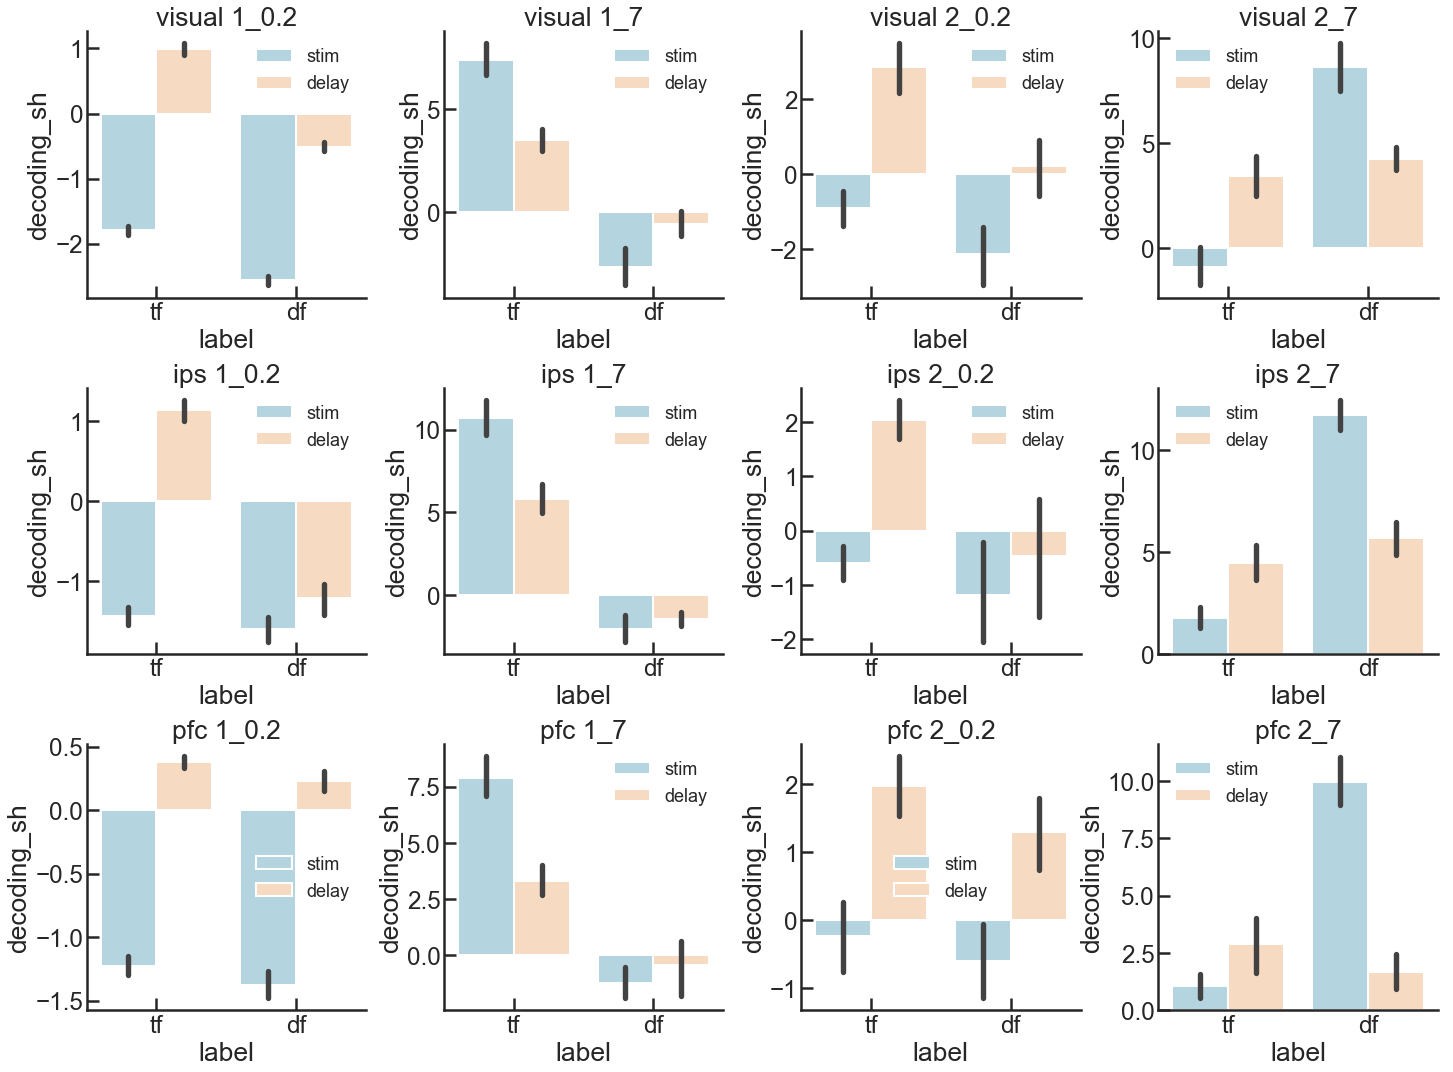

In [23]:
plt.figure(figsize=(20,15))

for idx_a, A in enumerate(['visual', 'ips', 'pfc']):
    for idx_c, C in enumerate(['1_0.2', '1_7', '2_0.2', '2_7']):
        plt.subplot(3,4, 4*idx_a+idx_c+1)
        sns.barplot(x='label', y='decoding_sh', hue='trained', order=['tf', 'df'], hue_order=['stim', 'delay'],
                    data=df_delay.loc[(df_delay['condition']==C) & (df_delay['region']==A)], 
                    palette=['lightblue', 'peachpuff', 'palegreen'], ci=68)
        plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
        plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
        plt.gca().get_xaxis().tick_bottom()                                                                                         
        plt.gca().get_yaxis().tick_left()
        plt.gca().tick_params(direction='in') #direction
        plt.legend(loc='best', frameon=False, prop={'size': 18})
        plt.title(A + ' ' + C)
        plt.xticks(rotation=0)
        

plt.tight_layout()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'target decoding')

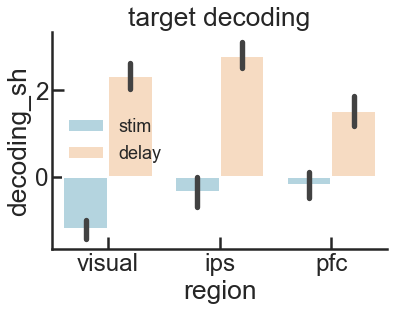

In [24]:
sns.barplot(x='region', y='decoding_sh', hue='trained', order=['visual', 'ips', 'pfc'], hue_order=['stim', 'delay'],
            data=df_delay.loc[(df_delay['item']=='target') & (df_delay['condition']!='1_7')], 
            palette=['lightblue', 'peachpuff', 'palegreen'], ci=68)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.legend(loc='best', frameon=False, prop={'size': 18})
plt.title('target decoding')

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'distractor decoding')

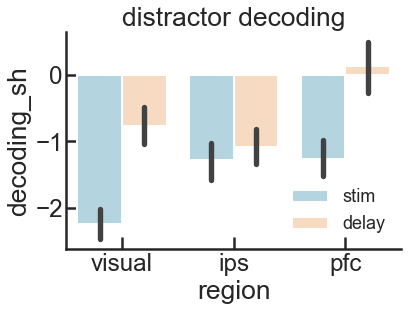

In [25]:
sns.barplot(x='region', y='decoding_sh', hue='trained', order=['visual', 'ips', 'pfc'], hue_order=['stim', 'delay'],
            data=df_delay.loc[(df_delay['item']=='dist') & (df_delay['condition']!='2_7')], 
            palette=['lightblue', 'peachpuff', 'palegreen'], ci=68)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.legend(loc='best', frameon=False, prop={'size': 18})
plt.title('distractor decoding')

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'')

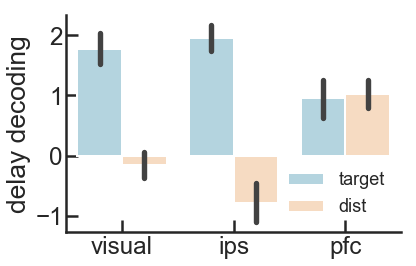

In [45]:
sns.barplot(x='region', y='decoding_sh', hue='item', order=['visual', 'ips', 'pfc'], hue_order=['target', 'dist'],
            data=df_delay.loc[(df_delay['trained']=='delay') & (df_delay['condition']!='1_7')  & (df_delay['condition']!='2_7')], 
            palette=['lightblue', 'peachpuff', 'palegreen'], ci=68)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.legend(loc='best', frameon=False, prop={'size': 18})
plt.xlabel('')
plt.ylabel('delay decoding')
plt.title('')

In [48]:
df_delay.head()

times  decoding  decoding_sh  region subject condition label    item  \
0  delay -1.932018    -1.792534  visual    d001     1_0.2    tc  target   
1  delay -2.151991    -2.261918  visual    d001     1_0.2    dc    dist   
2  delay  1.238720     1.150621  visual    d001     1_0.2    tc  target   
3  delay -0.720974    -0.725406  visual    d001     1_0.2    dc    dist   
4  delay  0.434070     0.251041  visual    d001     1_0.2    tc  target   

  trained distance  
0    stim    close  
1    stim    close  
2   delay    close  
3   delay    close  
4    resp    close

In [ ]:
linares_plot(x='region', y='decoding_sh', hue='item', order=['visual', 'ips', 'pfc'], hue_order=['target', 'dist'],
            df=df_delay.loc[(df_delay['trained']=='delay') & (df_delay['condition']!='1_7')  & (df_delay['condition']!='2_7')], 
            palette=['#285d9d', '#f55528'], CI=0.695,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=1000, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('delay decoding')
plt.gca().set_ylim(-3,3)
plt.gca().set_yticks([-3,0,3])
plt.title('')

In [46]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jun 28 12:26:52 2019
@author: David BestuÃ©
"""
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import scikits.bootstrap as bootstraps
from seaborn_sinaplot import sinaplot ## install it at https://github.com/mparker2/seaborn_sinaplot
import numpy as np


## Style of poster for the plots
sns.set_context("poster", font_scale=1.1) ## poster format
sns.set_style("ticks")


### bootstrap by subject
def boots_by_subj(data, col_int, col_subj, n_iterations, alpha, stat):
    #### if I want to compare two curves, I would use a sem to check the overlapping of the curves, so a=0.32 (ci = 1-0.68)
    #### you give a 2 column df, one column qith the value and the other column with subject index:
    list_subjects = data[col_subj].unique()
    sample=[]
    for n in range(n_iterations):
        resampled=[]
        new_sample = list(np.random.randint(0, len(list_subjects), len(list_subjects)))
        for res_s in new_sample:
            resampled = resampled + list(data.loc[data[col_subj]==list_subjects[res_s], col_int].values) 
        #
        sample.append(stat(resampled))
    #
    stats_sorted = np.sort(sample)
    new_mean=np.mean(sample)
    return (new_mean, stats_sorted[int((alpha/2.0)*n_iterations)],
            stats_sorted[int((1-alpha/2.0)*n_iterations)])



def adjust_spines(ax, spines):  ### aesthetics, offset axies 
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 20))  # outward by 10 points
            ### spine.set_smart_bounds(True) ##comment if you want to be free to set the ylims by your own
        else:
            spine.set_color('none')  # don't draw spine

    # turn off ticks where there is no spine
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')
    else:
        # no yaxis ticks
        ax.yaxis.set_ticks([])

    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')
    else:
        # no xaxis ticks
        ax.xaxis.set_ticks([])




def linares_plot(x, y, df, palette, order, hue=None, hue_order=None, point_size=1, alpha=0.4, CI=0.95,
                  width=0.6, statistic=np.mean, by_subj=False, subj_col=None, plot_box=True, MS=12, LW=4, 
                  reps=10000, leg=True, fill_box=False, alpha_box=1, sep_axis=True, L_size=16, loc_l='best'):
    ####
    ####
    ####
    ####  This plots consists of a SINAPLOT (plot the trials/subjects) showing the distribution &
    ####  a BOX with the statistic (mean/median) and with the 95% c.i done by bootstrap
    ####
    ####
    #### SINAPLOT
    if by_subj==True:                                                                                                           # sinaplpot: one point per subject
        if hue==None:                                                                                                           # hue for the sinaplot
            df_by_subj=[]
            for x_val in order:
                for s_subject in df[subj_col].unique():
                    val_subj = df.loc[(df[subj_col]==s_subject) & (df[x]==x_val), y].mean()
                    df_by_subj.append([x_val, val_subj])
            #
            df_by_subj = pd.DataFrame(df_by_subj)
            df_by_subj.columns=[x, y]
            df_by_subj = df_by_subj[~np.isnan(df_by_subj.iloc[:,1])]
            sinaplot.sinaplot(x=x, y=y, hue=hue, data=df_by_subj, violin=False, point_size=point_size, palette=palette, 
                alpha=alpha, order=order, hue_order=hue_order, width=width)

        else:                                                                                                                   #no hue for the sinaplot                                                             
            df_by_subj=[]
            for x_val in order:
                for h_val in hue_order:
                    for s_subject in df[subj_col].unique():
                        val_subj = df.loc[(df[subj_col]==s_subject) & (df[x]==x_val) & (df[hue]==h_val), y].mean()
                        df_by_subj.append([x_val, h_val, val_subj])
            #
            df_by_subj = pd.DataFrame(df_by_subj)
            df_by_subj.columns=[x, hue, y]
            df_by_subj = df_by_subj[~np.isnan(df_by_subj.iloc[:,2])]
            sinaplot.sinaplot(x=x, y=y, hue=hue, data=df_by_subj, violin=False, point_size=point_size, palette=palette, 
                alpha=alpha, order=order, hue_order=hue_order, width=width)

    else:                                                                                                                       # sinaplot: one point per trial (default)
        sinaplot.sinaplot(x=x, y=y, hue=hue, data=df, violin=False, point_size=point_size, palette=palette,
                      alpha=alpha, order=order, hue_order=hue_order, width=width)

    ##### BOX
    cis=[]
    stas_m = []
    if hue==None:                                                                                                               # Box with median and c.i 95%
        for i_x, x_idx in enumerate(order):
            if by_subj==True:
                df_boot_bysubj = pd.DataFrame({y: df.groupby(x).get_group(x_idx)[y], subj_col: df.groupby(x).get_group(x_idx)[subj_col]})
                new_mean, inf_b, sup_b = boots_by_subj(df_boot_bysubj, y, subj_col, n_iterations=reps, alpha=1-CI, stat=np.mean)
                ci= np.array([inf_b, sup_b])
                cis.append(ci)
            #
            else:
                ci= bootstraps.ci(df.groupby(x).get_group(x_idx)[y], statfunction=statistic, n_samples=reps,  alpha=1-CI)    # calculate the bootstrap (data no subject base)
                cis.append(ci)
            ##
            ####                
            m= statistic( df.loc[df[x]==x_idx, y] ) 
            stas_m.append(m)
            if plot_box==True:
                # vallue statistic
                left =  i_x - width/2   #i_x - width/len(order) 
                if fill_box==False: 
                    if len(palette)>1:
                        # position of rectangle
                        plt.gca().add_patch(Rectangle((left, ci[0]), width, ci[1]-ci[0],alpha=alpha_box, fill=False, linewidth=1,  edgecolor=palette[i_x]))                 # plot the rectangle 
                        plt.plot([left, left+width], [m,m ], color='k', linewidth=1) 
                    else:
                        plt.gca().add_patch(Rectangle((left, ci[0]), width, ci[1]-ci[0],alpha=alpha_box, fill=False, linewidth=1,  edgecolor=palette[0]))                 # plot the rectangle 
                        plt.plot([left, left+width], [m,m ], color='k', linewidth=1) 
                elif fill_box==True:
                    if len(palette)>1:
                        # position of rectangle
                        plt.gca().add_patch(Rectangle((left, ci[0]), width, ci[1]-ci[0],alpha=alpha_box, fill=True, facecolor=palette[i_x], 
                        linewidth=1,  edgecolor=palette[i_x]))                 # plot the rectangle 
                        plt.plot([left, left+width], [m,m ], color='k', linewidth=1) 
                    else:
                        plt.gca().add_patch(Rectangle((left, ci[0]), width, ci[1]-ci[0],alpha=alpha_box, fill=True, facecolor=palette[0], 
                        linewidth=1, edgecolor=palette[0]))                 # plot the rectangle 
                        plt.plot([left, left+width], [m,m ], color='k', linewidth=1) 
    #        
    else:                                                                                                                       # hue
        for i_x, x_idx in enumerate(order):
            for i_h, h_idx in enumerate(hue_order):
                try:
                    if by_subj==True:
                        df_boot_bysubj = pd.DataFrame({y: df.groupby(x).get_group(x_idx).groupby(hue).get_group(h_idx)[y], subj_col: df.groupby(x).get_group(x_idx).groupby(hue).get_group(h_idx)[subj_col]})
                        new_mean, inf_b, sup_b = boots_by_subj(df_boot_bysubj, y, subj_col, n_iterations=reps, alpha=1-CI, stat=np.mean)
                        ci= np.array([inf_b, sup_b])
                        cis.append(ci)
                    else:
                        ci= bootstraps.ci(df.groupby(x).get_group(x_idx).groupby(hue).get_group(h_idx)[y], statfunction=statistic,  alpha=1-CI, n_samples=reps)
                        cis.append(ci)
                    #
                    m= statistic( df.groupby(x).get_group(x_idx).groupby(hue).get_group(h_idx)[y] )
                    stas_m.append(m)
                    if plot_box==True:
                        if fill_box==False:
                            bar_length = width/len(hue_order) 
                            bott_left = i_x - width/2   + i_h*bar_length
                            plt.gca().add_patch(Rectangle((bott_left, ci[0]), bar_length , ci[1]-ci[0],
                                                          alpha=1, fill=False, linewidth=1, edgecolor=palette[i_h]))
                            plt.plot( [bott_left, bott_left+bar_length], [m,m ], palette[i_h], linewidth=3)
                        elif fill_box==True:
                            bar_length = width/len(hue_order) 
                            bott_left = i_x - width/2   + i_h*bar_length
                            plt.gca().add_patch(Rectangle((bott_left, ci[0]), bar_length , ci[1]-ci[0], 
                                                            alpha=alpha_box, fill=True, facecolor=palette[i_h], linewidth=1, edgecolor=palette[i_h]))
                            plt.plot( [bott_left, bott_left+bar_length], [m,m ], palette[i_h], linewidth=3)

                    
                except:
                    IndexError
    
    if plot_box=='line':
        if hue == None:
            means_=stas_m
            cis_ =cis
            x_s = np.array(range(len(order)))
            errors_abs = [abs(cis_[x]-means_[x]) for x in range(len(order))]
            neg_errors = [errors_abs[x][0] for x in range(len(order))]
            pos_errors = [errors_abs[x][1] for x in range(len(order))]
            plt.plot(x_s, means_, marker='o', markersize=MS, color=palette[0])
            plt.errorbar(x_s, means_, yerr=[neg_errors, pos_errors], color=palette[0], linewidth=LW)
            
        else:
            for i_h, h_idx in enumerate(hue_order): ##
                means_hue=stas_m[i_h::(len(hue_order))]
                cis_hue = cis[i_h::(len(hue_order))] 
                biases_pos = np.arange(-0.1, 1, 0.2)
                bias_x = biases_pos[i_h]               
                x_s = np.array(range(len(order))) + bias_x
                errors_abs = [abs(cis_hue[x]-means_hue[x]) for x in range(len(order))]
                neg_errors = [errors_abs[x][0] for x in range(len(order))]
                pos_errors = [errors_abs[x][1] for x in range(len(order))]
                plt.plot(x_s, means_hue, marker='o', markersize=MS, color=palette[i_h])
                plt.errorbar(x_s, means_hue, yerr=[neg_errors, pos_errors], color=palette[i_h], linewidth=LW)
                #
    ##
    if plot_box=='mean':
        if hue == None:
            means_=stas_m
            cis_ =cis
            x_s = np.array(range(len(order)))
            errors_abs = [abs(cis_[x]-means_[x]) for x in range(len(order))]
            neg_errors = [errors_abs[x][0] for x in range(len(order))]
            pos_errors = [errors_abs[x][1] for x in range(len(order))]
            if len(palette)>1:
                [plt.plot(x_s[n], means_[n], marker='o', markersize=MS, color=palette[n], linewidth=0) for n in range(len(means_))]
                [plt.errorbar(x_s[n], means_[n], yerr=[[neg_errors[n], pos_errors[n] ]], color=palette[n], 
                    linewidth=0, elinewidth=LW ) for n in range(len(means_))]
            else:
                [plt.plot(x_s[n], means_[n], marker='o', markersize=MS, color=palette[0], linewidth=0) for n in range(len(means_))]
                [plt.errorbar(x_s[n], means_[n], yerr=[[neg_errors[n], pos_errors[n] ]], color=palette[0], 
                    linewidth=0, elinewidth=LW ) for n in range(len(means_))]
            
        else:
            for i_h, h_idx in enumerate(hue_order):
                means_hue=stas_m[i_h::(len(hue_order))]
                cis_hue = cis[i_h::(len(hue_order))] 
                biases_pos = np.arange(-0.1, 1, 0.2)
                bias_x = biases_pos[i_h]               
                x_s = np.array(range(len(order))) + bias_x
                errors_abs = [abs(cis_hue[x]-means_hue[x]) for x in range(len(order))]
                neg_errors = [errors_abs[x][0] for x in range(len(order))]
                pos_errors = [errors_abs[x][1] for x in range(len(order))]
                plt.plot(x_s, means_hue, marker='o', markersize=MS, color=palette[i_h], linewidth=0)
                plt.errorbar(x_s, means_hue, yerr=[neg_errors, pos_errors], color=palette[i_h], 
                    linewidth=0, elinewidth=LW)
    #####
    plt.xticks(  np.arange(len(df[x].unique())) , order)                                                                       # Aesthetics of the plot
    plt.xlim(-0.5, len(df[x].unique())-0.5 )                                                                                    # xlim
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.gca().tick_params(direction='in') #direction
    ##
    if sep_axis==True: ##decide wether or not, separate the x and y
        adjust_spines(plt.gca(), ['left', 'bottom'])
    ##
    ##### Legend
    if leg==True:
        if hue!=None:
            l = plt.legend(loc=loc_l, frameon=False, prop={'size': L_size})
            for i_h, h_idx in enumerate(hue_order):
                l.get_texts()[i_h].set_text(h_idx)
                l.legendHandles[i_h].set_visible(False);
                l.get_texts()[i_h].set_color(palette[i_h]);
    if leg==False:
        l = plt.legend(loc=loc_l, frameon=False, prop={'size': 0})
    #l.get_texts()[0].set_text('delay=0')
    



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'decoding')

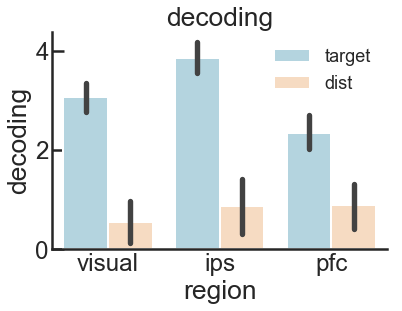

In [39]:
sns.barplot(x='region', y='decoding', hue='item', order=['visual', 'ips', 'pfc'], hue_order=['target', 'dist'],
            data=df_delay.loc[(df_delay['trained']=='delay')], 
            palette=['lightblue', 'peachpuff', 'palegreen'], ci=68)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.legend(loc='best', frameon=False, prop={'size': 18})
plt.title('decoding')

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


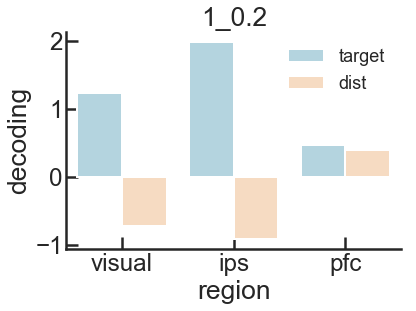

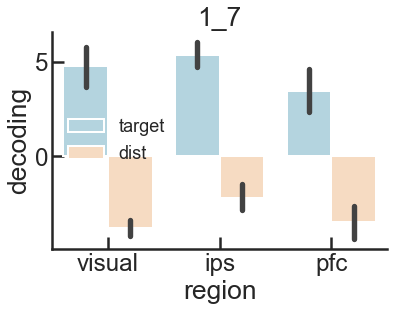

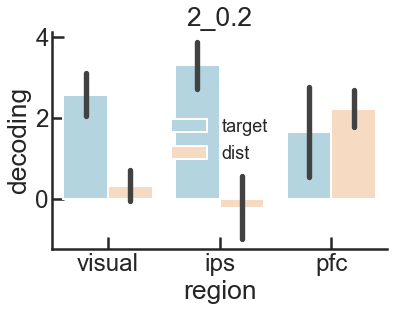

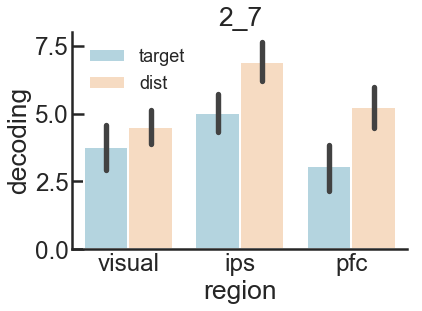

In [37]:
for C in ['1_0.2', '1_7', '2_0.2', '2_7']:
    sns.barplot(x='region', y='decoding', hue='item', order=['visual', 'ips', 'pfc'], hue_order=['target', 'dist'],
                data=df_delay.loc[(df_delay['trained']=='delay') & (df_delay['condition']==C) &
                                  (df_delay['distance']=='close')], 
                palette=['lightblue', 'peachpuff', 'palegreen'], ci=68)
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.gca().tick_params(direction='in') #direction
    plt.legend(loc='best', frameon=False, prop={'size': 18})
    plt.title(C)
    plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


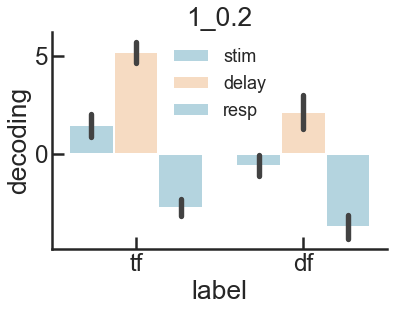

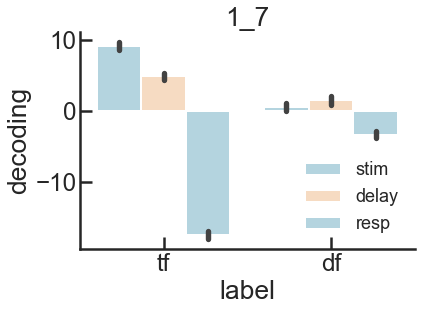

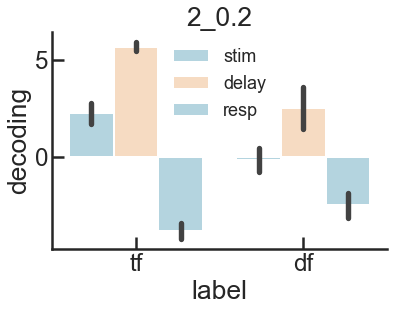

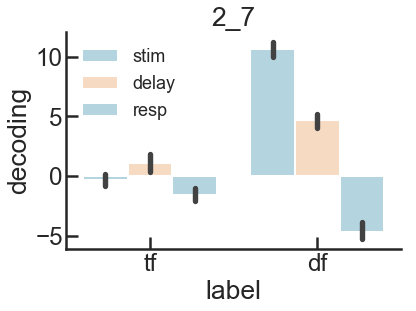

In [61]:
for C in ['1_0.2', '1_7', '2_0.2', '2_7']: 
    sns.barplot(x='label', y='decoding', hue='trained', data=df_delay.loc[df_delay['condition']==C],
                ci=68, palette=['lightblue', 'peachpuff'])
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.gca().tick_params(direction='in') #direction
    plt.legend(loc='best', frameon=False, prop={'size': 18})
    plt.xticks(rotation=0)
    plt.title(C)
    plt.show()

In [18]:
dfn = df.loc[(df['region']=='pfc') &  (df['times']== 9.34 | df['times']== 11.675  ) ]

sns.barplot(x='label', y='decoding', hue='trained', data=dfn, ci=68, palette=['lightblue', 'peachpuff'])
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.legend(loc='best', frameon=False, prop={'size': 18})
plt.xticks(rotation=0)
plt.show()


TypeError: cannot compare a dtyped [float64] array with a scalar of type [bool]

In [ ]:
## Colapsandolo todo: Condition y area
sns.barplot(x='label', y='decoding', hue='trained', data=df, ci=68, palette=['lightblue', 'peachpuff'])
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.legend(loc='best', frameon=False, prop={'size': 18})
plt.xticks(rotation=0)
plt.show()